In [49]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [50]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model

In [51]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state

In [52]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 7.44,  ss.L = 56.28,  ss.delta_L = 0.07,  ss.v = 16.52,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 55.46,  ss.W = 2.65
Government:
ss.B_G = 150.00,  ss.G = 50.00,  ss.tau = 0.38
Households:
solving for household behavior: result.converged = True
ss.C = 82.12,  ss.B = 168.84
Production firm FOCs:
ss.K = 553.31
Capital accumulation equation:
ss.I = 55.33
Output in production firm:
ss.Y = 227.87
Market clearing:
ss.C_Y = 57.48,  ss.G_Y = 45.00,  ss.I_Y = 35.97,  ss.X_Y = 89.42
[ ss.C_M = 24.64,  ss.G_M = 5.00,  ss.I_M = 19.37,  ss.X_M = 59.61 ] = ss.M = 108.61
ss.X = 149.03
Bargaining:
par.phi = 0.968


**Household behavior:**

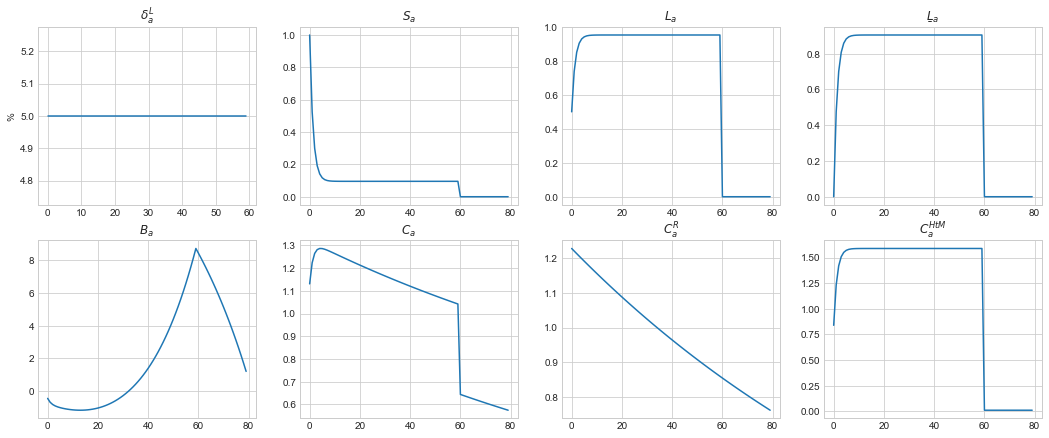

In [53]:
fig = plt.figure(figsize=(3*6,3*6/2.5))

ax = fig.add_subplot(2,4,1)
ax.plot(model.par.delta_L_a*100)
ax.set_ylabel('%')
ax.set_title('$\delta^L_a$')

ax = fig.add_subplot(2,4,2)
ax.plot(model.ss.S_a)
ax.set_title('$S_a$')

ax = fig.add_subplot(2,4,3)
ax.plot(model.ss.L_a)
ax.set_title('$L_a$')

ax = fig.add_subplot(2,4,4)
ax.plot(model.ss.L_ubar_a)
ax.set_title(r'$L\underbar_a$')

ax = fig.add_subplot(2,4,5)
ax.plot(model.ss.B_a)
ax.set_ylabel('')
ax.set_title('$B_a$')

ax = fig.add_subplot(2,4,6)
ax.plot(model.ss.C_a)
ax.set_ylabel('')
ax.set_title('$C_a$')

ax = fig.add_subplot(2,4,7)
ax.plot(model.ss.C_R_a)
ax.set_ylabel('')
ax.set_title('$C^R_a$')

ax = fig.add_subplot(2,4,8)
ax.plot(model.ss.C_HtM_a)
ax.set_ylabel('')
ax.set_title('$C^{HtM}_a$');

# Speed and error tests

In [54]:
model.set_exo_ss()
model.set_unknowns_ss()

**Python evaluation:**

In [55]:
%time model.evaluate_blocks(py=True)

CPU times: user 175 ms, sys: 1.75 ms, total: 177 ms
Wall time: 176 ms


**Check errors:**

In [56]:
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 0.00e+00
Bq_match            : abs. max = 1.17e+00
FOC_capital_agency  : abs. max = 0.00e+00
FOC_K_ell           : abs. max = 1.60e-14
mkt_clearing        : abs. max = 0.00e+00


**First numba evaluation:**

In [57]:
%time model.evaluate_blocks()

CPU times: user 6.75 s, sys: 105 ms, total: 6.86 s
Wall time: 6.93 s


**Time:**

In [58]:
%timeit model.evaluate_blocks()
%timeit model.get_errors()

The slowest run took 388.72 times longer than the fastest. This could mean that an intermediate result is being cached.
417 ms ± 997 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.1 µs ± 411 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [59]:
%timeit model.evaluate_blocks(py=True)

167 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Find an impulse-response

**Calculate Jacobian:**

In [60]:
model.calc_jac(do_print=True)

Jacobian calculated in 35.6 secs secs


**Set exogenous variables:**

In [61]:
Tshock = 50
shock = 0.01*ss.chi
persistence = 0.8**np.arange(Tshock)
sol.chi[:Tshock] = ss.chi + shock*persistence

Tshock = 50
shock = 0.03*ss.P_F
persistence = 0.80**np.arange(Tshock)
sol.P_F[:Tshock] = ss.P_F + shock*persistence

In [62]:
model.set_unknowns_ss()
model.evaluate_blocks()
errors = model.get_errors(do_print=True)

bargaining_cond     : abs. max = 0.00e+00
Bq_match            : abs. max = 1.17e+00
FOC_capital_agency  : abs. max = 0.00e+00
FOC_K_ell           : abs. max = 1.95e-14
mkt_clearing        : abs. max = 6.11e+00


**Find IRF:**

In [63]:
model.find_IRF()

initial:
   max. abs. error = 6.11e+00
    0.00e+00 in bargaining_cond
    1.17e+00 in Bq_match
    0.00e+00 in FOC_capital_agency
    1.95e-14 in FOC_K_ell
    6.11e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 6.11e+00
    9.01e-04 in bargaining_cond
    6.02e-02 in Bq_match
    6.75e-04 in FOC_capital_agency
    2.23e-02 in FOC_K_ell
    5.78e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 5.78e-01
    2.41e-04 in bargaining_cond
    6.16e-03 in Bq_match
    2.20e-04 in FOC_capital_agency
    5.58e-03 in FOC_K_ell
    1.00e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.00e-01
    6.36e-05 in bargaining_cond
    1.89e-03 in Bq_match
    5.98e-05 in FOC_capital_agency
    1.44e-03 in FOC_K_ell
    2.65e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Figures

## National accouting - quantities

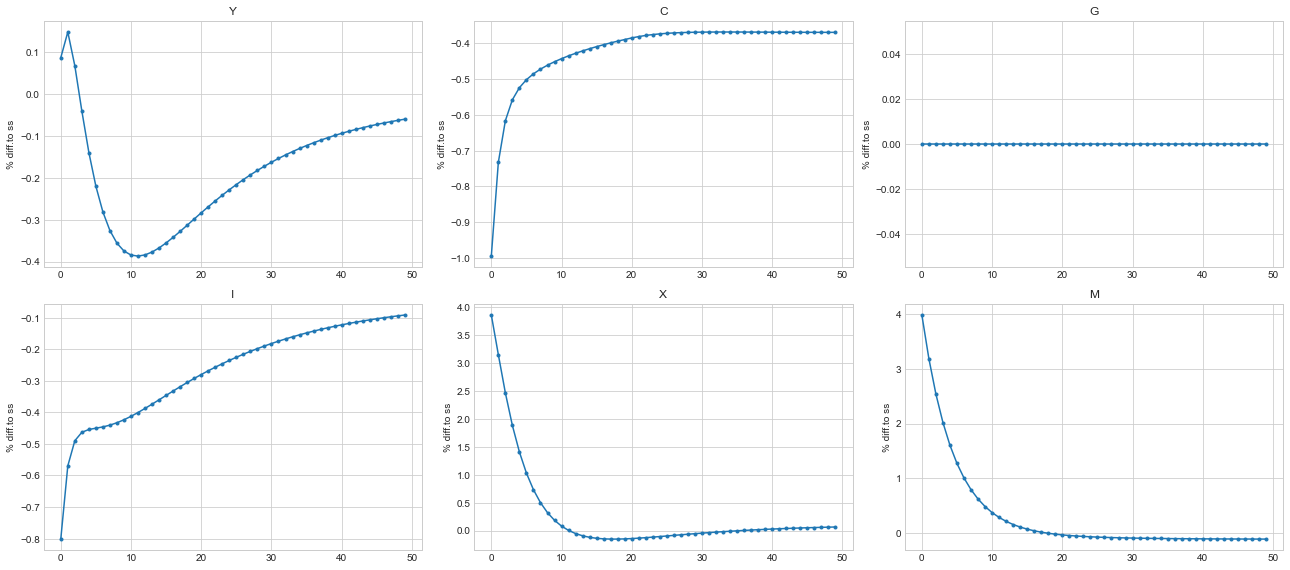

In [64]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

## National Accouting - Prices

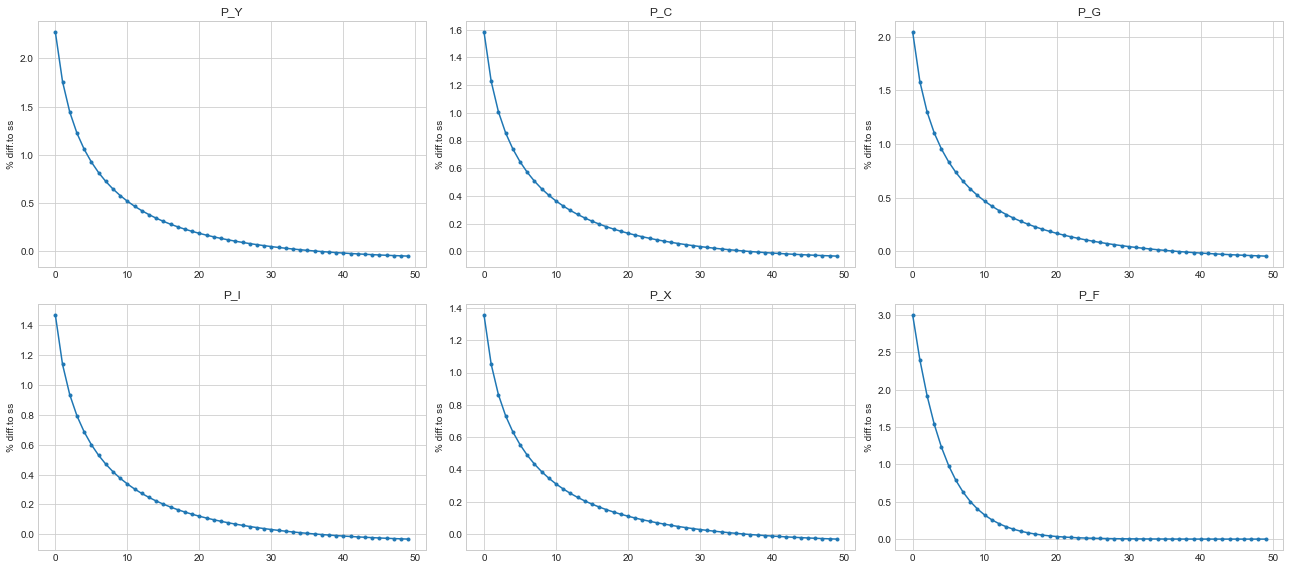

In [73]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F'])

## Labor market

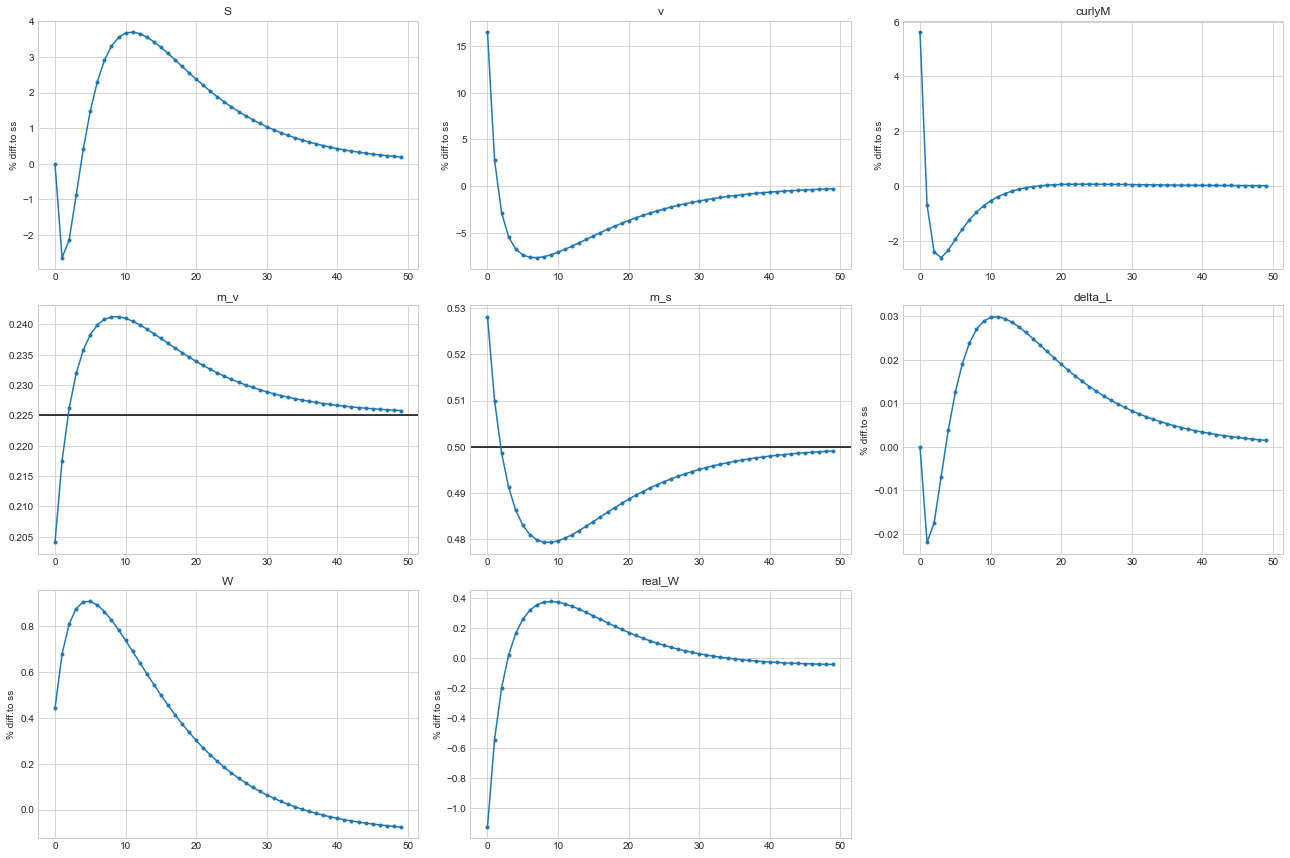

In [66]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

## Capital accumulation

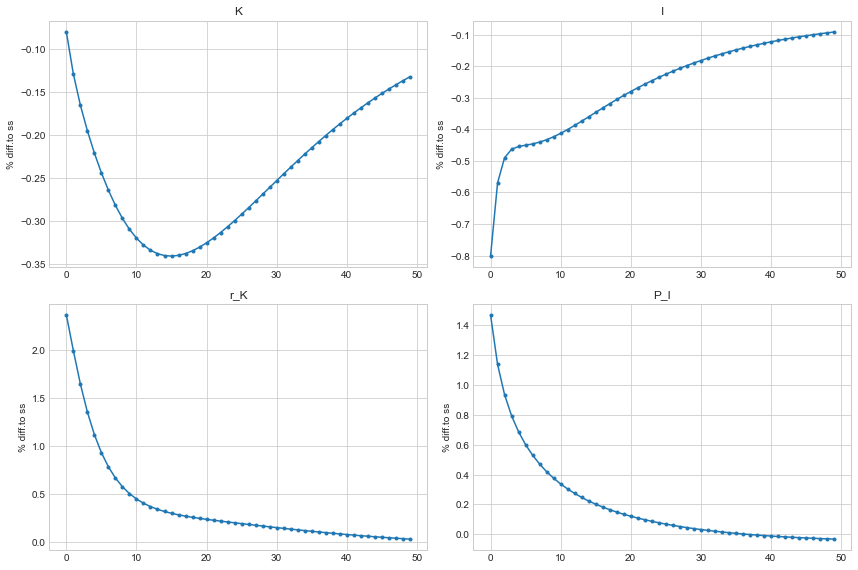

In [67]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

## Production firms

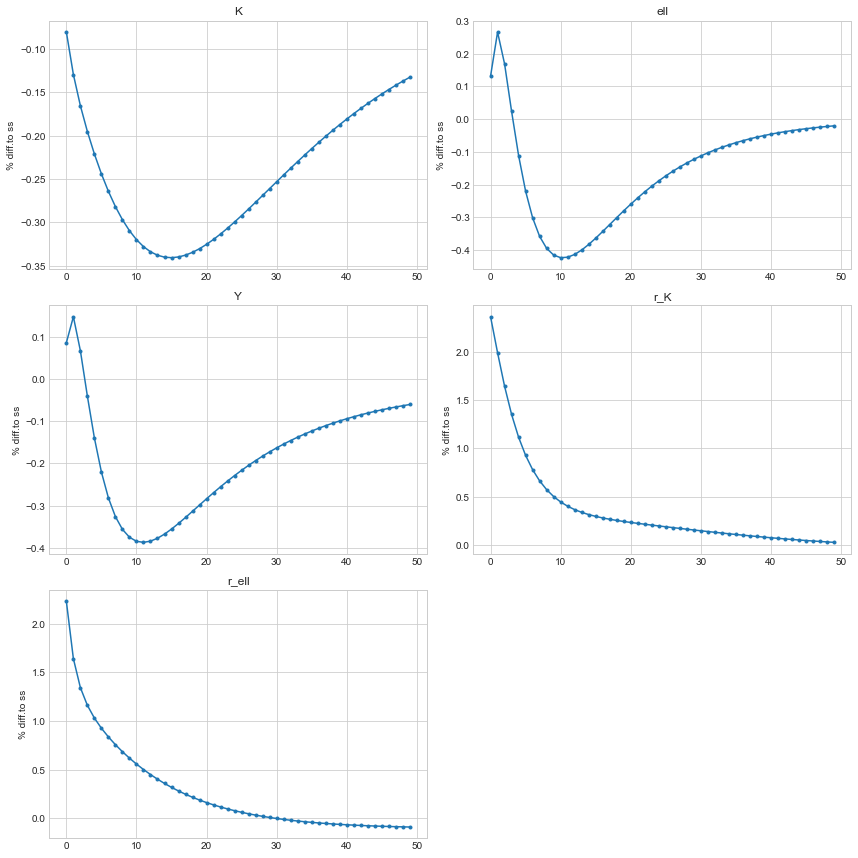

In [68]:
model.plot_IRF(varlist=['K','ell','Y','r_K','r_ell'],ncol=2)

## Government

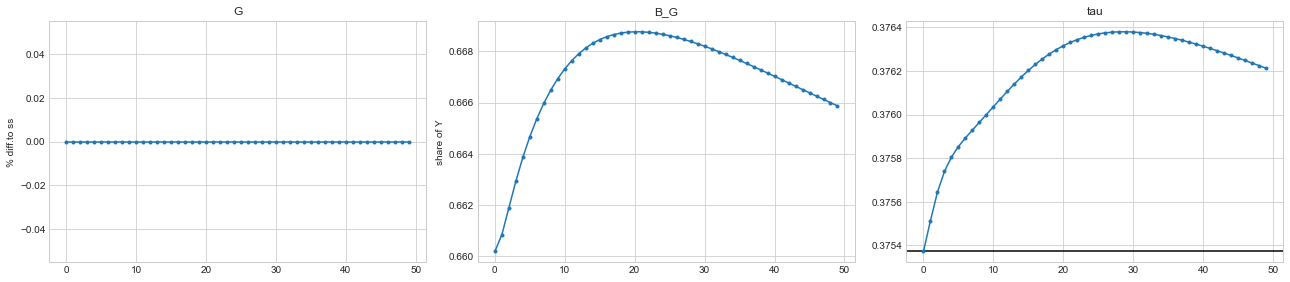

In [69]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'])

## Households - aggregate

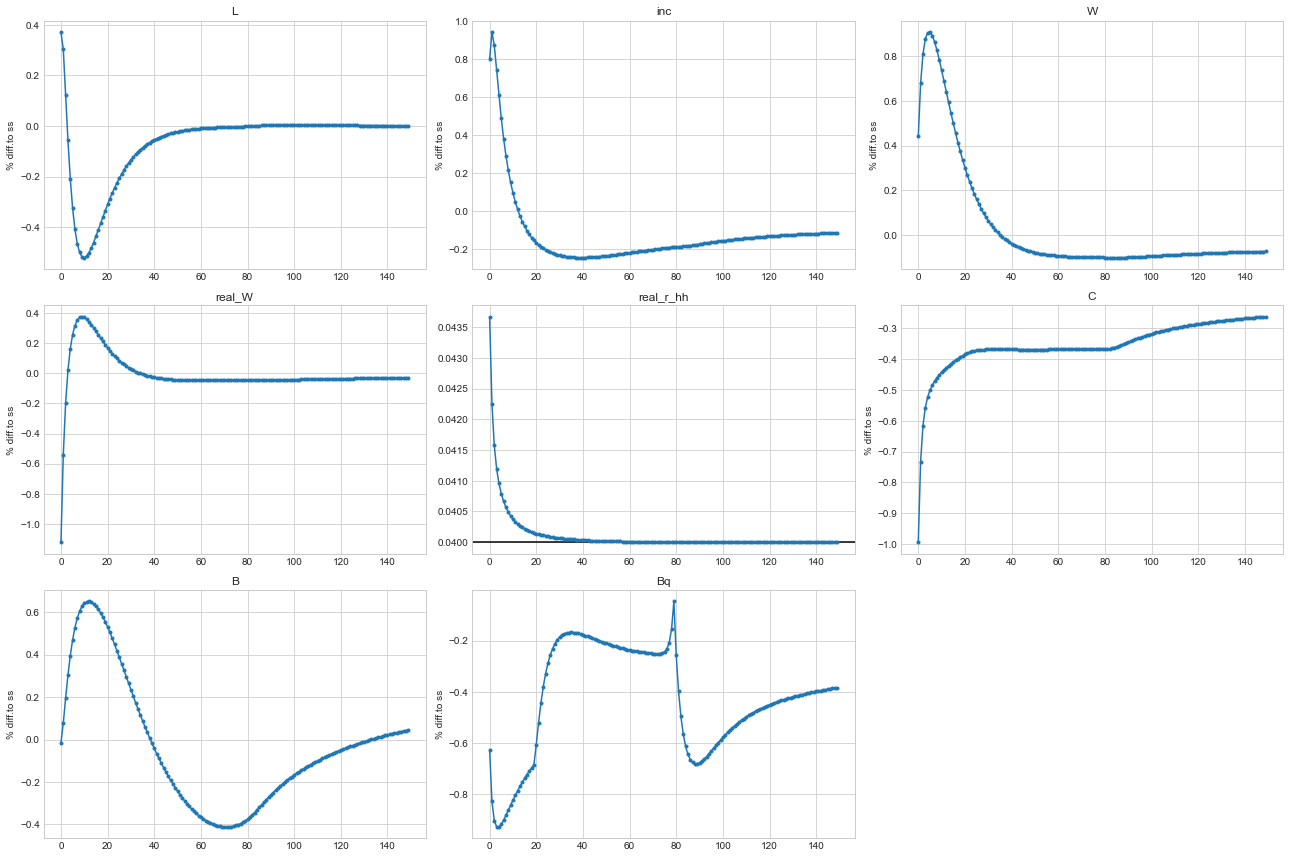

In [70]:
model.plot_IRF(varlist=['L','inc','W','real_W','real_r_hh','C','B','Bq'],ncol=3, T_IRF = 150,abs=['real_r_hh'])

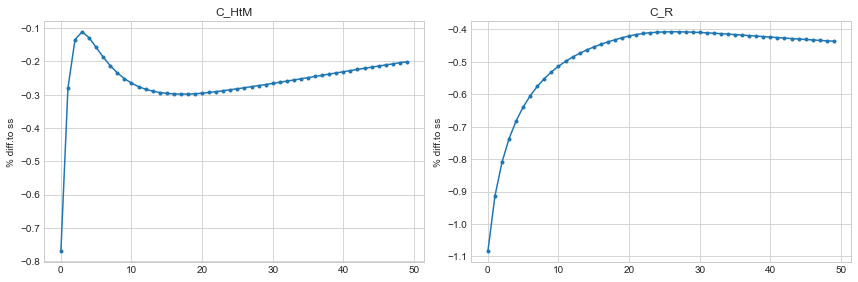

In [71]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

## Households - life-cycle

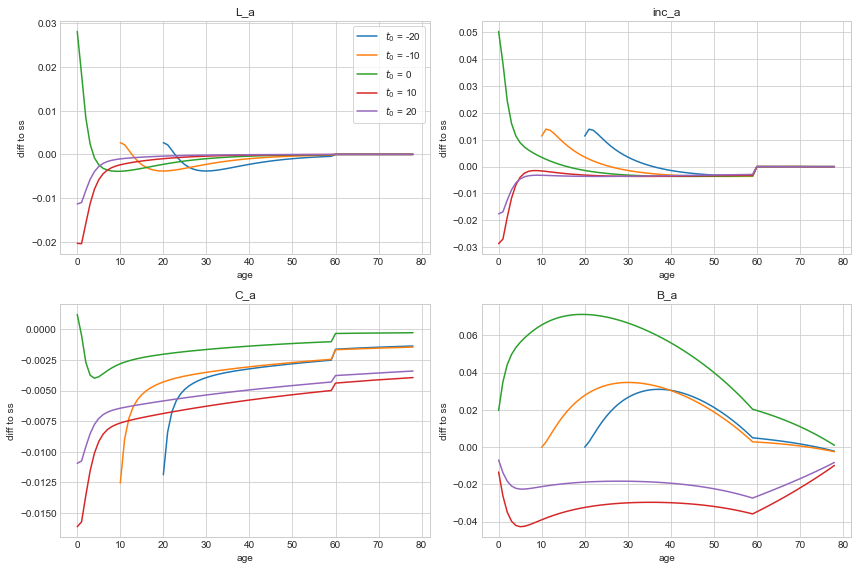

In [72]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','B_a'],t0_list=[-20,-10,0,10,20])